In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
# from matplotlib.backends.backend_agg import FigureCanvasAgg
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


### Feature Descriptions:
1. age: Age of the patient (Numeric).
2. sex: Gender of the patient. Values: 1 = male, 0 = female.
3. cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.
4. trestbps: Resting Blood Pressure (in mm Hg) (Numeric).
5. chol: Serum Cholesterol level (in mg/dl) (Numeric).
6. fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.
7. restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
8. thalach: Maximum heart rate achieved (Numeric).
9. exang: Exercise-induced angina. Values: 1 = yes, 0 = no.
10. oldpeak: ST depression induced by exercise relative to rest (Numeric).
11. slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
12. ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.
13. thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.
14. target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.

In [2]:
data_df = pd.read_csv('cleaned_merged_heart_dataset.csv')
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Assigning X and y features
X = data_df.drop('target', axis = 1)
y = data_df['target']

In [4]:
#splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [5]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=100000),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'XGBoost Regressor': XGBRegressor(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),

    
}

In [6]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # converting regressor model to binary
    if 'Regressor' in name:
        y_pred = (y_pred >= 0.5).astype(int)
    print(f"{name} Results:")
    print(classification_report(y_test, y_pred))
    print()

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       197
           1       0.70      0.78      0.74       181

    accuracy                           0.73       378
   macro avg       0.74      0.73      0.73       378
weighted avg       0.74      0.73      0.73       378


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       197
           1       0.96      0.97      0.97       181

    accuracy                           0.97       378
   macro avg       0.97      0.97      0.97       378
weighted avg       0.97      0.97      0.97       378


Decision Tree Classifier Results:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       197
           1       0.93      0.96      0.94       181

    accuracy                           0.94       378
   macro avg       0.94      

c:\Users\Amina\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Regressor Results:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       197
           1       0.96      0.96      0.96       181

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378


Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       197
           1       0.90      0.94      0.92       181

    accuracy                           0.92       378
   macro avg       0.92      0.92      0.92       378
weighted avg       0.92      0.92      0.92       378




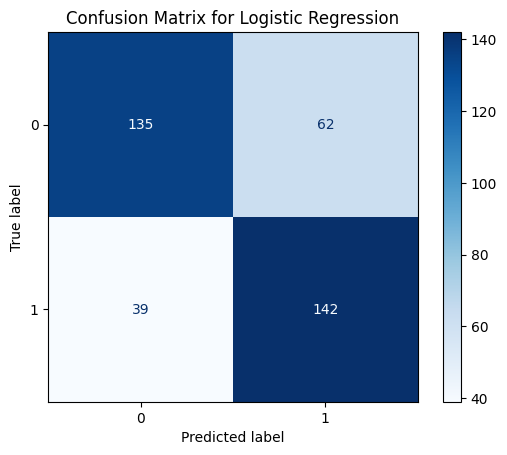

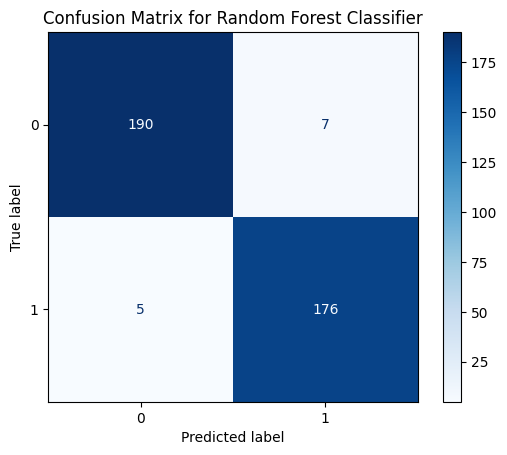

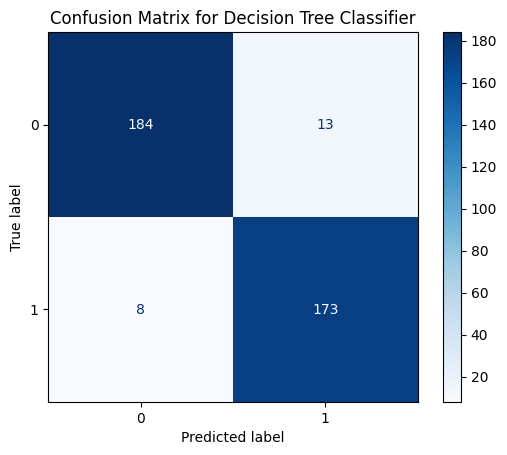

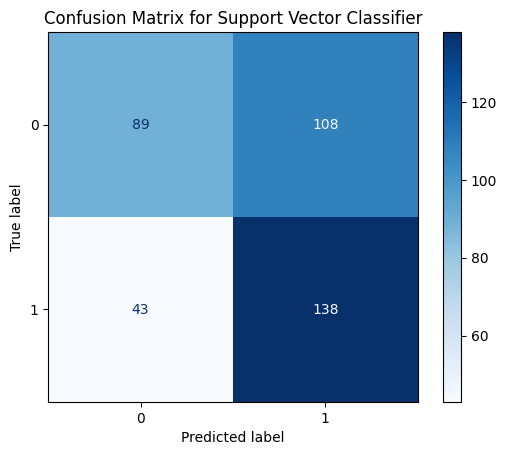

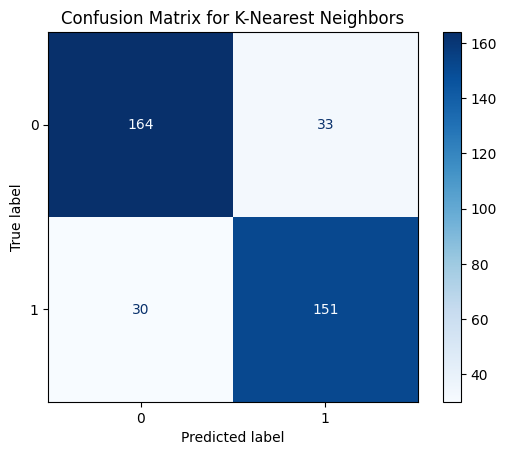

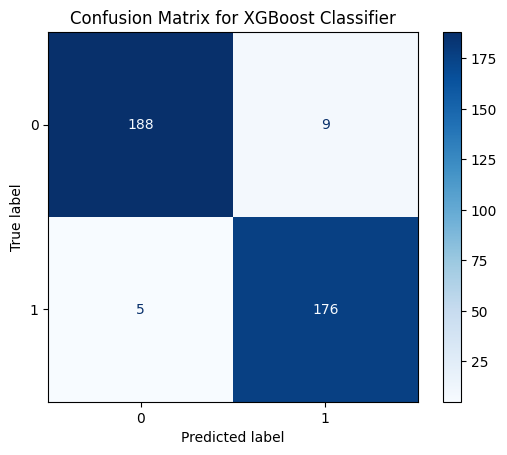

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [7]:
#confusion matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    con_matr = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=con_matr)
    display.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [ ]:
from sklearn.base import RegressorMixin

for name, model in models.items():
	y_pred = model.predict(X_test)
	# If the model is a regressor, convert predictions to binary
	if isinstance(model, RegressorMixin):
		y_pred = (y_pred >= 0.5).astype(int)
	print(f"{name} Results:")
	print(classification_report(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       197
           1       0.70      0.78      0.74       181

    accuracy                           0.73       378
   macro avg       0.74      0.73      0.73       378
weighted avg       0.74      0.73      0.73       378

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       197
           1       0.95      0.97      0.96       181

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378

Decision Tree Classifier Results:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       197
           1       0.93      0.96      0.94       181

    accuracy                           0.94       378
   macro avg       0.94      0.

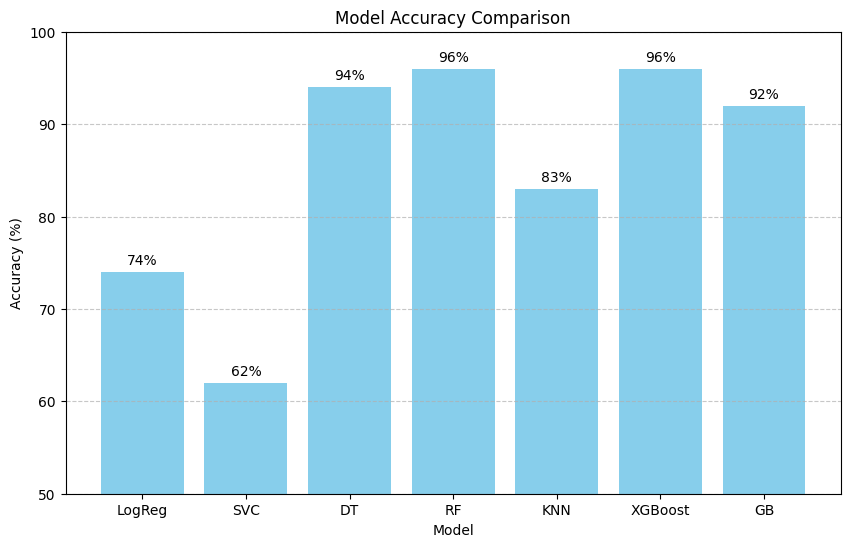

In [14]:
import matplotlib.pyplot as plt

models = ['LogReg', 'SVC', 'DT', 'RF', 'KNN', 'XGBoost', 'GB']
accuracy = [74, 62, 94, 96, 83, 96, 92]

plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracy, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(50, 100)

# lets add the value labels on top
for bar in bars:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, y_value + 0.5, f'{y_value}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()
plt.savefig('model_accuracy_comparison.png', dpi=300)


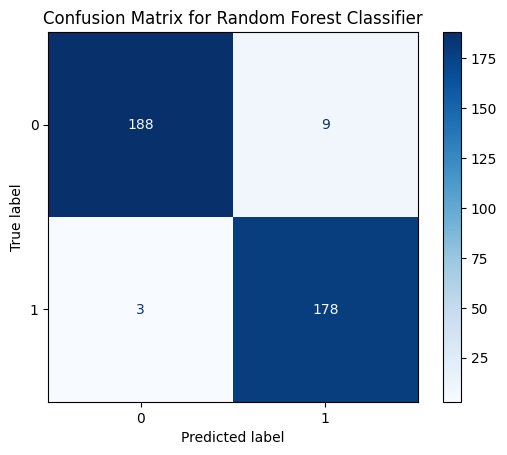

In [10]:
#plot confusion matrix for random forest classifier
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
con_matr = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=con_matr)

#save it as an image in png
display.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Random Forest Classifier")
plt.savefig('confusion_matrix_random_forest.png', dpi=300)



